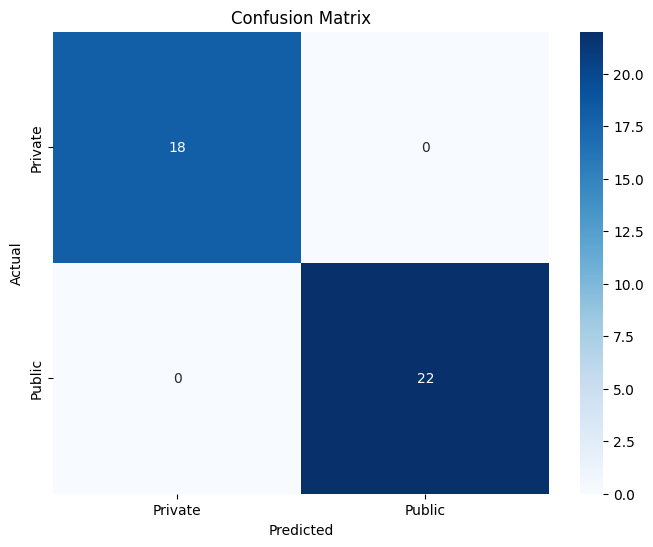

Accuracy: 1.0
Confusion Matrix:
 [[18  0]
 [ 0 22]]


ModuleNotFoundError: No module named 'ace_tools'

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new CSV file
file_path = 'bigNewWalletData.csv'
df = pd.read_csv(file_path)

# Randomize the order of the rows in the dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Prepare the text data and labels
X = df['Embedding'].apply(eval).tolist()  # Assuming the embeddings are stored as strings
y = df['Label']  # Use the Label column for the target

# Convert embeddings to a numpy array
X_embeddings = np.array(X)

# Apply PCA to reduce the dimensionality of the embeddings to 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_embeddings)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Private", "Public"], yticklabels=["Private", "Public"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Replace the 'Embedding' column with the compressed embeddings and add the predictions
df_test = df.loc[y_test.index].copy()
df_test['Embedding'] = [list(X_pca[i]) for i in y_test.index]
df_test['Predicted Label'] = y_pred

# Save the test results to a CSV
results_csv_path = 'nw_test_results.csv'
df_test.to_csv(results_csv_path, index=False)


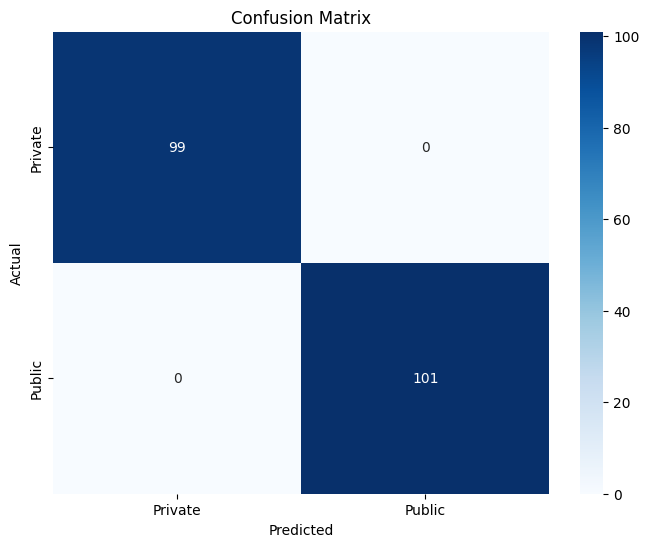

Accuracy: 1.0
Confusion Matrix:
 [[ 99   0]
 [  0 101]]
Test results saved to mega_test_results.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openai
import dotenv import load_dotenv

load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')

# Initialize OpenAI client with API key
client = openai.OpenAI(api_key=api_key)

# Function to embed a batch of texts using OpenAI's embedding model
def embed_text_batch(texts):
    response = client.embeddings.create(
        input=texts,  # The texts to be embedded
        model="text-embedding-3-small"  # The model used for embedding
    )
    return [item.embedding for item in response.data]  # Return the embeddings

# Load the new CSV file
file_path = 'ADDRESSmegalist.csv'
df = pd.read_csv(file_path)

# Randomize the order of the rows in the dataframe and select 1000 random rows
df = df.sample(n=1000, random_state=42).reset_index(drop=True)

# Prepare the text data and labels
X = df['ADDRESS'].tolist()
y = df['Label']

# Embed the text data
embeddings = embed_text_batch(X)

# Convert embeddings to a numpy array
X_embeddings = np.array(embeddings)

# Apply PCA to reduce the dimensionality of the embeddings to 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_embeddings)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Private", "Public"], yticklabels=["Private", "Public"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Create a DataFrame for the test set with original columns
df_test = df.loc[y_test.index].copy()
df_test['ADDRESS'] = [list(X_pca[i]) for i in range(len(y_test))]
df_test['Predicted Label'] = y_pred

# Save the test results to a CSV
results_csv_path = 'mega_test_results.csv'
df_test.to_csv(results_csv_path, index=False)

print(f"Test results saved to {results_csv_path}")
